# (1) Preprocessing: Detect face and eyes
When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread(r"C:\Sports_Celebraity_Classifier\model\test image\sharapova1.jpg")
img.shape

(555, 700, 3)

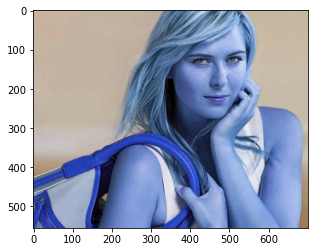

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

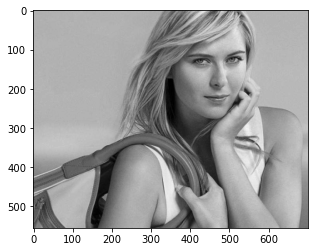

In [6]:
image=plt.imshow(gray, cmap='gray')
image

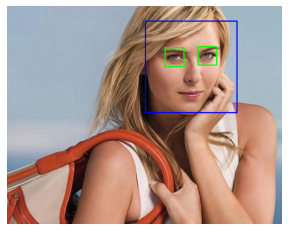

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade Classifiers for face and eyes
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the image
image_path = (r"C:\Sports_Celebraity_Classifier\model\test image\sharapova1.jpg") # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print(f"Failed to load the image from {image_path}")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces first
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Region of interest for eyes within the detected face
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]

        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    # Convert the image to RGB for matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detected eyes
    plt.imshow(rgb_image)
    plt.axis('off')  # Turn off the axis
    plt.show()


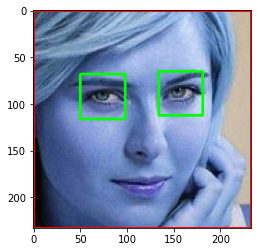

In [8]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [9]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

# (3) Preprocessing: Use wavelet transform as a feature for training our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc Wavelet transform

In [10]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

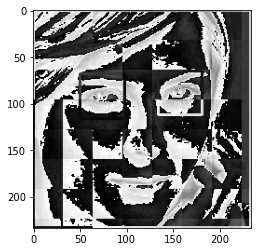

In [11]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

# (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

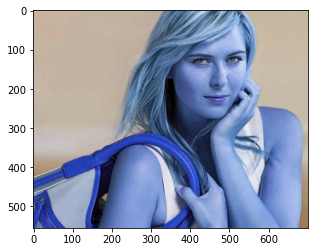

In [13]:
original_image = cv2.imread(r"C:\Sports_Celebraity_Classifier\model\test image\sharapova1.jpg")
plt.imshow(original_image)

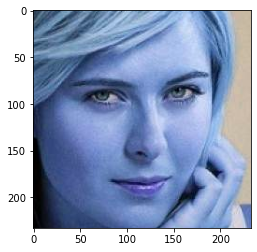

In [14]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Sports_Celebraity_Classifier\model\test image\sharapova1.jpg")
plt.imshow(cropped_image)

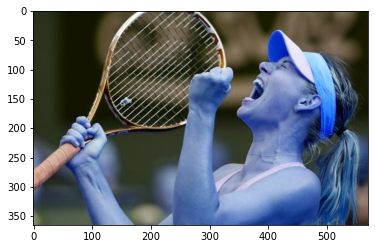

In [15]:
org_image_obstructed = cv2.imread(r"C:\Sports_Celebraity_Classifier\model\test image\sharapova2.JPG")
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"C:\Sports_Celebraity_Classifier\model\test image\sharapova2.JPG")
cropped_image_no_2_eyes

Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [17]:
path_to_data =r"C:\Sports_Celebraity_Classifier\model\dataset"
path_to_cr_data =r"C:\Sports_Celebraity_Classifier\model\dataset\cropped"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped',
 'C:\\Sports_Celebraity_Classifier\\model\\dataset\\maria sharapova',
 'C:\\Sports_Celebraity_Classifier\\model\\dataset\\messi',
 'C:\\Sports_Celebraity_Classifier\\model\\dataset\\roger federer - Google Search',
 'C:\\Sports_Celebraity_Classifier\\model\\dataset\\serena williams - Google Search',
 'C:\\Sports_Celebraity_Classifier\\model\\dataset\\virat kohli - Google Search']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    print(f"Processing celebrity: {celebrity_name}")

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file():
            file_path = entry.path
            
            # ✅ Debugging: Check if file exists before processing
            if not os.path.exists(file_path):
                print(f"Error: File {file_path} does not exist.")
                continue

            # ✅ Read the image
            image = cv2.imread(file_path)
            
            if image is None:
                print(f"Error: Unable to read image {file_path}")
                continue

            # ✅ Process cropped images
            roi_color = get_cropped_image_if_2_eyes(file_path)
            
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"Generating cropped images in folder: {cropped_folder}")

                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)

                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1


Processing celebrity: cropped
Processing celebrity: maria sharapova
Generating cropped images in folder: C:\Sports_Celebraity_Classifier\model\dataset\cropped\maria sharapova
Processing celebrity: messi
Generating cropped images in folder: C:\Sports_Celebraity_Classifier\model\dataset\cropped\messi
Processing celebrity: roger federer - Google Search
Generating cropped images in folder: C:\Sports_Celebraity_Classifier\model\dataset\cropped\roger federer - Google Search
Error: Unable to read image C:\Sports_Celebraity_Classifier\model\dataset\roger federer - Google Search\com_lookaside_crawler_media_ (1).htm
Error: Unable to read image C:\Sports_Celebraity_Classifier\model\dataset\roger federer - Google Search\com_lookaside_crawler_media_ (2).htm
Error: Unable to read image C:\Sports_Celebraity_Classifier\model\dataset\roger federer - Google Search\com_lookaside_crawler_media_.htm
Error: Unable to read image C:\Sports_Celebraity_Classifier\model\dataset\roger federer - Google Search\com_

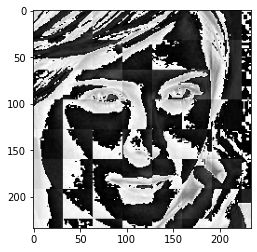

In [22]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [25]:
celebrity_file_names_dict

{'cropped': [],
 'maria sharapova': ['C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_1.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_2.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_3.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_4.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_5.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_6.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_7.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_8.png',
  'C:\\Sports_Celebraity_Classifier\\model\\dataset\\cropped\\maria sharapova\\maria sharapova_9.png',
  'C:\\Sports_Celebraity_Classifier\\m

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'cropped': 0,
 'maria sharapova': 1,
 'messi': 2,
 'roger federer - Google Search': 3,
 'serena williams - Google Search': 4,
 'virat kohli - Google Search': 5}

In [27]:
x = []
y = []



for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
            
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        

In [28]:
len(x)

175

In [29]:
len(x[0])

4096

In [30]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(175, 4096)

In [31]:
x[0]

array([ 62., 110., 122., ...,  33.,  19., 251.])

# data cleaning done .now we can train the model

## we can use svm


In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test, y_test)

0.75

In [34]:
len(x_test)

44

In [35]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         9
           2       0.67      0.73      0.70        11
           3       0.67      0.57      0.62         7
           4       0.78      0.70      0.74        10
           5       1.00      0.71      0.83         7

    accuracy                           0.75        44
   macro avg       0.77      0.74      0.75        44
weighted avg       0.76      0.75      0.75        44



# lets us use grid search cv to try different model with different parameter.Goal is to get best model

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.711396,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.603704,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.780342,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(x_test,y_test)

0.7272727272727273

In [41]:
best_estimators['random_forest'].score(x_test,y_test)

0.5909090909090909

In [42]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7727272727272727

In [43]:
best_clf = best_estimators['svm']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[9, 0, 0, 0, 0],
       [1, 8, 1, 1, 0],
       [1, 1, 4, 1, 0],
       [1, 2, 1, 6, 0],
       [1, 1, 0, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

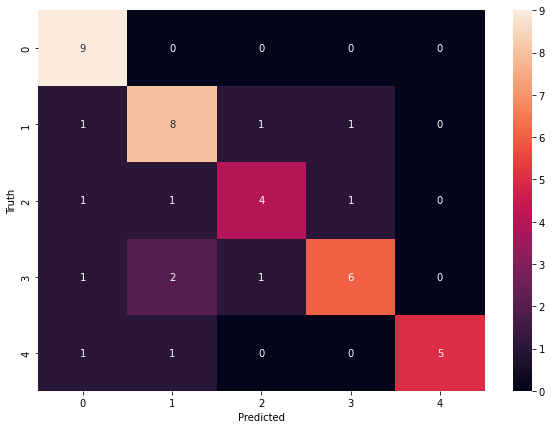

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [73]:
class_dict

{'maria sharapova': 0,
 'messi': 1,
 'roger federer - Google Search': 2,
 'serena williams - Google Search': 3,
 'virat kohli - Google Search': 4}

# save the trained model

In [47]:
!pip install joblib
import joblib
# save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

# save class dictionary

In [48]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))